# Atliq Hospitality Domain Analysis 

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Data importation and exploration to understand the dataset 

In [5]:
df_booking = pd.read_csv("fact_bookings.csv")
df_hotels = pd.read_csv("dim_hotels.csv")
df_agg_booking = pd.read_csv("aggregated_bookings.csv")
df_room = pd.read_csv("dim_rooms.csv")
df_date = pd.read_csv("dim_date.csv")

In [4]:
import pandas as pd
df_booking = pd.read_csv("fact_bookings.csv")
df_booking.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


# Now lets do some exploratory task

In [99]:
df_booking.shape

(134590, 12)

In [100]:
df_booking.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [101]:
df_booking.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [102]:
df_booking.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

# Data visualization using matplotlib, seaborn

<Axes: xlabel='booking_platform'>

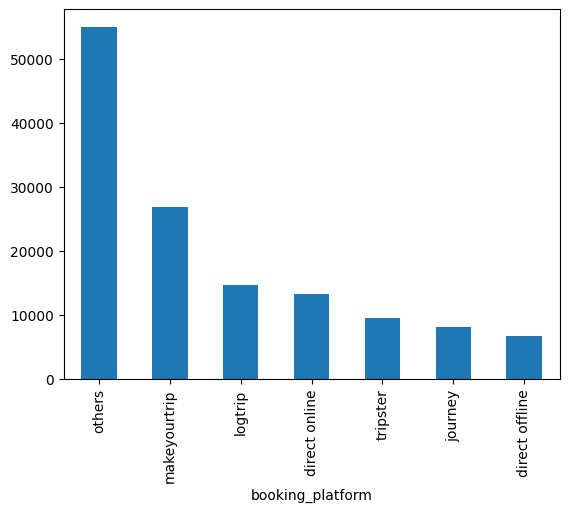

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
df_booking.booking_platform.value_counts().plot(kind = "bar")

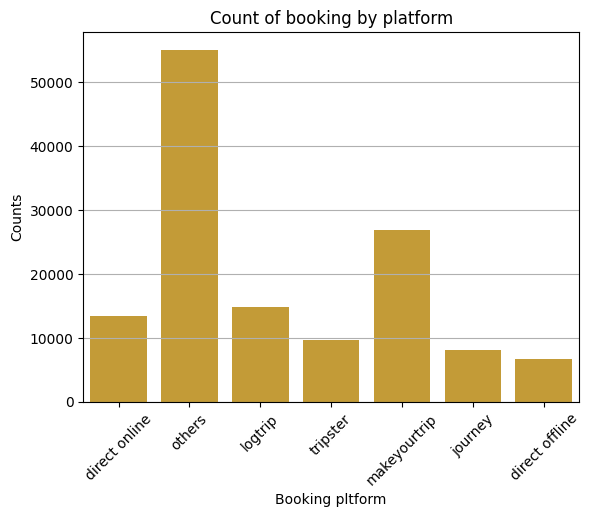

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x = "booking_platform", data = df_booking, color ='goldenrod')
plt.title("Count of booking by platform")
plt.xlabel("Booking pltform")
plt.ylabel("Counts")
plt.xticks(rotation = 45)
plt.grid(axis = "y")

In [23]:
df_booking.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [104]:
df_booking.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134590.000000,56683.000000,134590.000000,134590.000000
mean,18061.113493,2.036808,3.619004,14916.013188,12696.123256
std,1093.055847,1.031766,1.235009,6452.868072,6928.108124
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


In [105]:
df_booking["revenue_generated"].min(),df_booking["revenue_generated"].max()

(6500, 45220)

In [106]:
df_hotels = pd.read_csv("dim_hotels.csv")
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [107]:
df_hotels.shape

(25, 4)

In [28]:
df_hotels.isnull().sum()

property_id      0
property_name    0
category         0
city             0
dtype: int64

In [108]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

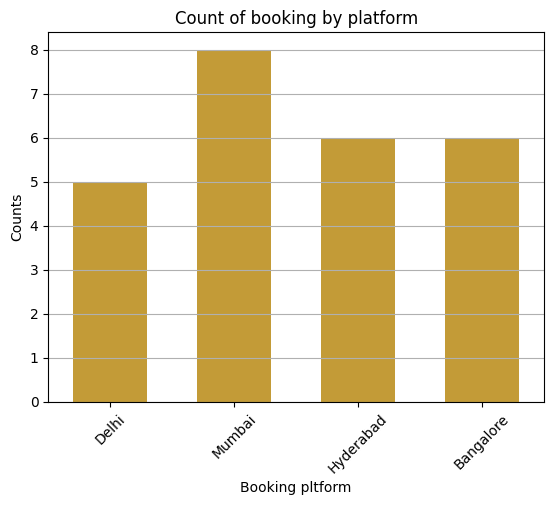

In [36]:
# df_hotels.city.value_counts().sort_values().plot(kind = 'barh')

sns.countplot(x = "city", data = df_hotels,  color ='goldenrod', width = 0.6)
plt.title("Count of booking by platform")
plt.xlabel("Booking pltform")
plt.ylabel("Counts")
plt.xticks(rotation = 45)
plt.grid(axis = "y")

In [109]:
# Analyzing data
df_agg_booking = pd.read_csv("aggregated_bookings.csv")
df_agg_booking.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19


In [37]:
df_agg_booking.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

In [39]:
df_agg_booking.shape

(9200, 5)

In [40]:
df_agg_booking["property_id"].unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

# Finding out total bookings per property Id

In [48]:
grups = df_agg_booking.groupby("property_id")["successful_bookings"].sum()
grups

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7147
17558    5036
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4728
19558    4371
19559    4705
19560    5979
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

In [112]:
df_agg_booking[df_agg_booking["successful_bookings"] > df_agg_booking["capacity"]] #think it capacity is not lesser


,property_id,check_in_date,room_category,successful_bookings,capacity


In [ ]:
#Find out properties that have highest capacity

In [54]:
df_agg_booking[df_agg_booking["capacity"] == df_agg_booking["capacity"].max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,01-May-22,RT2,38,50
128,17558,02-May-22,RT2,27,50
229,17558,03-May-22,RT2,26,50
328,17558,04-May-22,RT2,27,50
428,17558,05-May-22,RT2,29,50
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50
8828,17558,28-Jul-22,RT2,21,50
8928,17558,29-Jul-22,RT2,23,50
9028,17558,30-Jul-22,RT2,32,50


# Data Cleaning


In [12]:
df_booking.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134590.000000,56683.000000,134590.000000,134590.000000
mean,18061.113493,2.036808,3.619004,14916.013188,12696.123256
std,1093.055847,1.031766,1.235009,6452.868072,6928.108124
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


In [136]:
# We clear out the columns that have no guest as nagative value 
df_booking[df_booking["no_guests"]<0].sum()

booking_id             0
property_id            0
booking_date           0
check_in_date          0
checkout_date          0
no_guests              0
room_category          0
booking_platform       0
ratings_given        0.0
booking_status         0
revenue_generated      0
revenue_realized       0
dtype: object

In [137]:
df_booking.shape

(134590, 12)

# Using statistical method -

In [138]:
min,max =df_booking["revenue_generated"].min(), df_booking["revenue_generated"].max()
min,max

(6500, 45220)

In [139]:
avg,std = df_booking["revenue_generated"].mean(),df_booking["revenue_generated"].std()
avg,std

(14916.013188201203, 6452.86807176819)

In [140]:
higher_limit, lower_limit = avg + 3*std, avg - 3*std
higher_limit, lower_limit

(34274.61740350578, -4442.591027103368)

In [141]:
df_booking[df_booking["revenue_generated"] < 0] #in these data dont have a any nagative value

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [64]:
df_booking[df_booking["revenue_generated"] > higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,2022-04-27,2022-05-01,2022-05-07,4,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,2022-05-01,2022-05-01,2022-05-02,6,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,2022-04-28,2022-05-01,2022-05-03,3,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,2022-04-24,2022-05-01,2022-05-07,5,RT4,logtrip,NaN,Checked Out,41990,41990
153,May012216559RT417,16559,2022-04-30,2022-05-01,2022-05-02,4,RT4,others,NaN,Cancelled,38760,15504
...,...,...,...,...,...,...,...,...,...,...,...,...
134467,Jul312219562RT45,19562,2022-07-28,2022-07-31,2022-08-01,6,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134469,Jul312219562RT47,19562,2022-07-10,2022-07-31,2022-08-06,5,RT4,makeyourtrip,NaN,Cancelled,37050,14820
134474,Jul312219562RT412,19562,2022-07-25,2022-07-31,2022-08-06,5,RT4,direct offline,5.0,Checked Out,37050,37050
134581,Jul312217564RT42,17564,2022-07-31,2022-07-31,2022-08-01,4,RT4,makeyourtrip,4.0,Checked Out,38760,38760


In [142]:
df_booking.shape

(134590, 12)

In [143]:
df_booking = df_booking[df_booking["revenue_generated"] <higher_limit]
df_booking.shape

(133070, 12)

In [144]:
df_booking["revenue_realized"].describe()

count    133070.000000
mean      12468.775464
std        6537.748605
min        2600.000000
25%        7600.000000
50%       11400.000000
75%       15300.000000
max       34200.000000
Name: revenue_realized, dtype: float64

In [145]:
# USING STATISTICAL METHOD IN BOOKING TABLE
avg1,std1 = df_booking["revenue_realized"].mean(), df_booking["revenue_realized"].std()
avg1, std1

(12468.775464041482, 6537.748605314661)

In [146]:
higher_limit1 = avg1 + std1*3
higher_limit1

32082.021279985467

In [95]:
df_booking[df_booking["revenue_realized"] > higher_limit1]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,2022-04-27,2022-05-01,2022-05-07,4,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,2022-05-01,2022-05-01,2022-05-02,6,RT4,tripster,3.0,Checked Out,45220,45220
140,May012216559RT44,16559,2022-04-28,2022-05-01,2022-05-05,2,RT4,others,NaN,Checked Out,32300,32300
141,May012216559RT45,16559,2022-04-28,2022-05-01,2022-05-04,2,RT4,others,5.0,Checked Out,32300,32300
143,May012216559RT47,16559,2022-04-28,2022-05-01,2022-05-03,3,RT4,others,5.0,Checked Out,35530,35530
...,...,...,...,...,...,...,...,...,...,...,...,...
134582,Jul312217564RT43,17564,2022-07-31,2022-07-31,2022-08-03,1,RT4,others,1.0,Checked Out,32300,32300
134584,Jul312217564RT45,17564,2022-07-30,2022-07-31,2022-08-01,2,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,38760,38760


In [147]:
df_booking.isnull().sum() # check null value

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77054
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [155]:
df_agg_booking.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

In [154]:
df_agg_booking = df_agg_booking.fillna(df_agg_booking["capacity"].mean())
df_agg_booking

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18
9196,16559,31-Jul-22,RT4,13,18
9197,17558,31-Jul-22,RT4,3,6
9198,19563,31-Jul-22,RT4,3,6


In [156]:
df_agg_booking[df_agg_booking["successful_bookings"] > df_agg_booking["capacity"]] #Analyzing data

,property_id,check_in_date,room_category,successful_bookings,capacity


In [157]:
df_agg_booking[df_agg_booking["successful_bookings"] < df_agg_booking["capacity"]]

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18
9196,16559,31-Jul-22,RT4,13,18
9197,17558,31-Jul-22,RT4,3,6
9198,19563,31-Jul-22,RT4,3,6


## DATA TRANSFORMATION

In [88]:
df_agg_booking.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19


In [158]:
df_agg_booking["occ_pct"] = df_agg_booking["successful_bookings"] / df_agg_booking["capacity"]
df_agg_booking.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,01-May-22,RT1,25,30,0.833333
1,19562,01-May-22,RT1,28,30,0.933333
2,19563,01-May-22,RT1,23,30,0.766667
3,17558,01-May-22,RT1,13,19,0.684211
4,16558,01-May-22,RT1,18,19,0.947368


In [159]:
df_agg_booking["occ_pct"] = df_agg_booking["occ_pct"].apply(lambda x: round(x*100,2))
df_agg_booking.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,01-May-22,RT1,25,30,83.33
1,19562,01-May-22,RT1,28,30,93.33
2,19563,01-May-22,RT1,23,30,76.67


# INSIDE GENERATION

In [160]:
df_agg_booking.groupby("room_category")["occ_pct"].mean().round(2)

room_category
RT1    57.92
RT2    58.01
RT3    58.03
RT4    59.28
Name: occ_pct, dtype: float64

In [161]:
df_room = pd.read_csv("dim_rooms.csv")
df_room.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [38]:
df = pd.merge(df_agg_booking,df_room,left_on = "room_category",right_on = "room_id")
df

,property_id,check_in_date,room_category,successful_bookings,capacity,room_id,room_class
0,16559,01-May-22,RT1,25,30,RT1,Standard
1,19562,01-May-22,RT1,28,30,RT1,Standard
2,19563,01-May-22,RT1,23,30,RT1,Standard
3,17558,01-May-22,RT1,13,19,RT1,Standard
4,16558,01-May-22,RT1,18,19,RT1,Standard
...,...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18,RT4,Presidential
9196,16559,31-Jul-22,RT4,13,18,RT4,Presidential
9197,17558,31-Jul-22,RT4,3,6,RT4,Presidential
9198,19563,31-Jul-22,RT4,3,6,RT4,Presidential


In [163]:
df.groupby("room_class")["occ_pct"].mean().round(2)

room_class
Elite           58.01
Premium         58.03
Presidential    59.28
Standard        57.92
Name: occ_pct, dtype: float64

In [164]:
df.drop("room_id",axis=1, inplace= True)
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,01-May-22,RT1,25,30,83.33,Standard
1,19562,01-May-22,RT1,28,30,93.33,Standard
2,19563,01-May-22,RT1,23,30,76.67,Standard


In [165]:
df_hotels.head() 

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [166]:
df.head(2)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,01-May-22,RT1,25,30,83.33,Standard
1,19562,01-May-22,RT1,28,30,93.33,Standard


In [39]:
df1 = pd.merge(df_hotels,df, on = "property_id")
df1.head(2)

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,room_id,room_class
0,16558,Atliq Grands,Luxury,Delhi,01-May-22,RT1,18,19,RT1,Standard
1,16558,Atliq Grands,Luxury,Delhi,01-May-22,RT2,21,22,RT2,Elite


In [170]:
df1.groupby("city").occ_pct.mean().round(2)

city
Bangalore    56.34
Delhi        61.52
Hyderabad    58.12
Mumbai       57.92
Name: occ_pct, dtype: float64

<Axes: xlabel='city'>

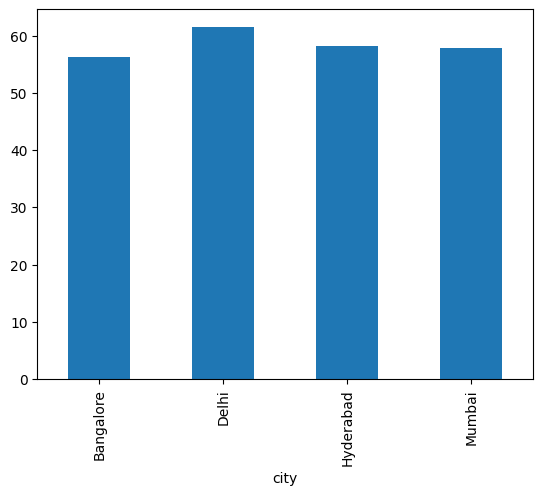

In [171]:
df1.groupby("city").occ_pct.mean().round(2).plot(kind = "bar")

In [172]:
df_date = pd.read_csv("dim_date.csv")
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [30]:
df1.head(2)

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16558,Atliq Grands,Luxury,Delhi,01-May-22,RT1,18,19,0.947368,Standard
1,16558,Atliq Grands,Luxury,Delhi,01-May-22,RT2,21,22,0.954545,Elite


# Merge table

In [173]:

df2 = pd.merge(df1,df_date, left_on = "check_in_date", right_on = "date" )
df2.head(3)

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,date,mmm yy,week no,day_type
0,16558,Atliq Grands,Luxury,Delhi,01-May-22,RT1,18,19,94.74,Standard,01-May-22,May 22,W 19,weekend
1,16558,Atliq Grands,Luxury,Delhi,01-May-22,RT2,21,22,95.45,Elite,01-May-22,May 22,W 19,weekend
2,16558,Atliq Grands,Luxury,Delhi,01-May-22,RT3,8,8,100.00,Premium,01-May-22,May 22,W 19,weekend


In [174]:
df2.groupby("day_type").occ_pct.mean().round(2)

day_type
weekeday    51.81
weekend     73.96
Name: occ_pct, dtype: float64

In [175]:
df2["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [176]:
df_june22 = df2[df2["mmm yy"] == "Jun 22"].groupby("city").occ_pct.mean().round(2).sort_values(ascending = False)
df_june22

city
Delhi        61.46
Mumbai       57.79
Hyderabad    57.69
Bangalore    55.85
Name: occ_pct, dtype: float64

In [40]:
df_hotels.head(2)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai


In [45]:
df_revenue = pd.merge(df_booking,df_hotels, on = "property_id")
df_revenue.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [46]:
df_revenue.groupby("city")["revenue_realized"].sum()

city
Bangalore    420397050
Delhi        294500318
Hyderabad    325232870
Mumbai       668640991
Name: revenue_realized, dtype: int64

In [181]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [55]:
df_booking["room_category"][df_booking.revenue_realized > higher_limit].unique()

array(['RT4'], dtype=object)

In [56]:
df_booking[df_booking.room_category == 'RT4'].revenue_realized.describe()

count    16073.000000
mean     23440.103652
std       9048.865206
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [63]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [64]:
df1.head()

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16558,Atliq Grands,Luxury,Delhi,01-May-22,RT1,18,19,0.947368,Standard
1,16558,Atliq Grands,Luxury,Delhi,01-May-22,RT2,21,22,0.954545,Elite
2,16558,Atliq Grands,Luxury,Delhi,01-May-22,RT3,8,8,1.000000,Premium
3,16558,Atliq Grands,Luxury,Delhi,01-May-22,RT4,3,3,1.000000,Presidential
4,16558,Atliq Grands,Luxury,Delhi,02-May-22,RT1,12,19,0.631579,Standard


In [66]:
df2 = pd.merge(df1,df_date, left_on = 'check_in_date', right_on = 'date')
df2.head(3)

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,date,mmm yy,week no,day_type
0,16558,Atliq Grands,Luxury,Delhi,01-May-22,RT1,18,19,0.947368,Standard,01-May-22,May 22,W 19,weekend
1,16558,Atliq Grands,Luxury,Delhi,01-May-22,RT2,21,22,0.954545,Elite,01-May-22,May 22,W 19,weekend
2,16558,Atliq Grands,Luxury,Delhi,01-May-22,RT3,8,8,1.000000,Premium,01-May-22,May 22,W 19,weekend


In [182]:
df2.groupby('day_type').occ_pct.mean().round(2)

day_type
weekeday    51.81
weekend     73.96
Name: occ_pct, dtype: float64

# in the month of june, what was the occupancy for different cityes.

In [70]:
df2["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [183]:
df_june22 = df2[df2["mmm yy"] == 'Jun 22'].groupby('city').occ_pct.mean().round(2).sort_values(ascending = False)
df_june22

city
Delhi        61.46
Mumbai       57.79
Hyderabad    57.69
Bangalore    55.85
Name: occ_pct, dtype: float64

In [47]:
df_revenue.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi


In [42]:
df_date.head(2)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday


In [48]:
pd.merge(df_revenue,df_date, left_on = 'check_in_date', right_on = 'date')

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type


In [194]:
df_revenue['check_in_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 133070 entries, 0 to 133069
Series name: check_in_date
Non-Null Count   Dtype 
--------------   ----- 
133070 non-null  object
dtypes: object(1)
memory usage: 1.0+ MB


In [195]:
df_date["date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 92 entries, 0 to 91
Series name: date
Non-Null Count  Dtype 
--------------  ----- 
92 non-null     object
dtypes: object(1)
memory usage: 868.0+ bytes


In [51]:
df_date['date'] = pd.to_datetime(df_date["date"])
df_date.head(4)

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday


In [197]:
df_revenue["check_in_date"] = pd.to_datetime(df_revenue["check_in_date"],format = "mixed")
df_revenue.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi


In [200]:
df_month = pd.merge(df_revenue, df_date, left_on = 'check_in_date', right_on = 'date')
df_month.head(2)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend


In [201]:
df_month.groupby("mmm yy")["revenue_realized"].sum().sort_values()

mmm yy
Jun 22    537219271
Jul 22    556460174
May 22    565540506
Name: revenue_realized, dtype: int64

In [202]:
df_month.groupby("property_name")["revenue_realized"].sum()

property_name
Atliq Bay        255735290
Atliq Blu        256643260
Atliq City       279554213
Atliq Exotica    302862944
Atliq Grands     207800708
Atliq Palace     294193161
Atliq Seasons     62430375
Name: revenue_realized, dtype: int64

In [203]:
# print average rate per city
df_month.groupby("city")["ratings_given"].mean().round()

city
Bangalore    3.0
Delhi        4.0
Hyderabad    4.0
Mumbai       4.0
Name: ratings_given, dtype: float64

<Axes: ylabel='revenue_realized'>

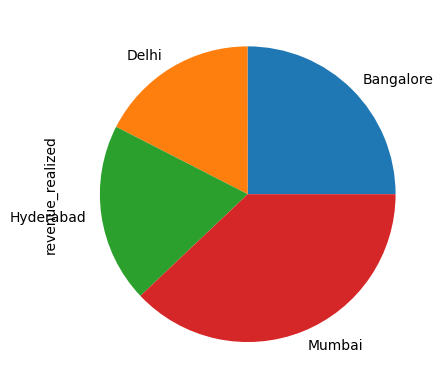

In [204]:
# Print a pie chart for revenue city
df_month.groupby("city")["revenue_realized"].sum().plot(kind= 'pie')

<Axes: ylabel='revenue_realized'>

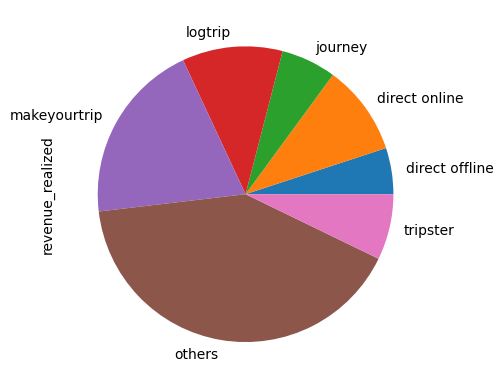

In [205]:
# Print a pie chart for revenue realized per booking platform
df_month.groupby("booking_platform")["revenue_realized"].sum().plot(kind= 'pie')